In [30]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np

from moviepy.editor import *
from moviepy.video.io.bindings import mplfig_to_npimage

In [37]:
scenes = []
WIDTH = 480
HEIGHT = 270
WHITE=(255,255,255)

In [2]:
import os
import csv

from IPython.core.display import display

class Speaker():
    
    def __init__(self, path):
        self.path = path
        self.audio = AudioFileClip(path)
        
        labels_file = os.path.join(os.path.dirname(path), "labels.txt")
        
        with open(labels_file, "r") as fd:
            self.sections = [ (float(x[0]), float(x[1])) for x in csv.reader(fd, delimiter="\t") ]
        
    def __len__(self):
        return len(self.sections)
        
    def __getitem__(self, key):
        start, end = self.sections[key]
        
        return self.audio.subclip(start, end)

class MovieFiles(object):
    def __init__(self, path="."):
        self.path = path
    
    def __getitem__(self, key):
        new_path = os.path.join(self.path, key)
        
        if os.path.isdir(new_path):
            return MovieFiles(new_path)
        elif os.path.isfile(new_path):
            if os.path.basename(new_path) == "speaker.flac":
                return Speaker(new_path)
        
        raise Exception(new_path)
        
data = MovieFiles()

In [3]:
def background(audio):
    b = CompositeVideoClip([ColorClip(size=(w,h), color=(255,255,255), duration=audio.duration)])
    b.audio = audio
    return b

# Szene 1

1. Wenn wir uns stetige Funktionen anschauen, so können wir den Eindruck gewinnen, dass ihre Umkehrfunktionen immer stetig sind.
2. Nehmen wir zum Beispiel die Quadratfunktion auf dem Bereich der nicht negativen Zahlen.
3. Ihre Umkehrfunktion ist die Wurzelfunktion, welche wie die Quadratfunktion selbst stetig ist.
4. Ein weiteres Beispiel ist die Exponentialfunktion.
5. Sie ist stetig und ihre Umkehrfunktion, die Logarthmusfunktion, ist es auch.

In [36]:
scene = []
speaker = data["scenes"]["scene01"]["audio"]["speaker.flac"]

scene.append(background(speaker[0]))

ValueError: cannot reshape array of size 64800 into shape (270,480,4)

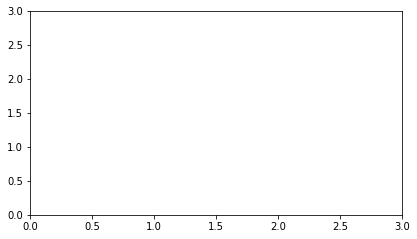

In [6]:
from skimage.color import rgba2rgb

def figure_to_image(fig):
    fig.canvas.draw()
    
    data = np.fromstring(fig.canvas.tostring_argb(), dtype=np.float64, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    data = np.roll(data, -1, 2)
    data = rgba2rgb(data)

x = np.linspace(0,3,1000)

fig, ax = plt.subplots()

dpi = fig.get_dpi()
fig.set_size_inches(w / dpi, h / dpi)

ax.set_xlim((0,3))
ax.set_ylim((0,3))

bg = figure_to_image(fig)

ax.plot(x,x**2)

square = figure_to_image(fig)

v = VideoClip(make_frame = lambda t: data * 255, duration=speaker[1].duration)
v.audio = speaker[1]

#display(v.ipython_display(fps=10))
#concatenate_videoclips([scene[0], v.fadein(2, initial_color=WHITE)]).ipython_display(fps=10)

fig.clear()

plt.imshow(square)

In [ ]:
from skimage.color import rgba2rgb

def figure_to_image(fig):
    fig.canvas.draw()
    
    data = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    data = np.roll(data, -1, 2) / 255
    
    return data
    
fig = plt.figure()
dpi = fig.get_dpi()
fig.set_size_inches(w / dpi, h / dpi)

ax = fig.add_subplot(111)
ax.patch.set_alpha(0)
ax.patch.set_facecolor('none')
ax.set_xlim((0,3))
ax.set_ylim((0,3))

bg = figure_to_image(fig)

x = np.linspace(0,3,1000)

ax.plot(x, x**2)

import math

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis/math.sqrt(np.dot(axis, axis))
    a = math.cos(theta/2.0)
    b, c, d = -axis*math.sin(theta/2.0)
    aa, bb, cc, dd = a*a, b*b, c*c, d*d
    bc, ad, ac, ab, bd, cd = b*c, a*d, a*c, a*b, b*d, c*d
    return np.array([[aa+bb-cc-dd, 2*(bc+ad), 2*(bd-ac)],
                     [2*(bc-ad), aa+cc-bb-dd, 2*(cd+ab)],
                     [2*(bd+ac), 2*(cd-ab), aa+dd-bb-cc]])

m = rotation_matrix([1,1,0], np.pi)

ps = np.dot(m, np.stack((x, x**2, np.zeros_like(x))))

ax.plot(ps[0],ps[1])

display(np.dot(m,vs))

square = figure_to_image(fig)

#fig.clear()

#plt.imshow(rgba2rgb(square, background=(1,0,0)))

#square[bg[:,:,3] != 0] = [0.,0.,0.,0.]

#plt.imshow(rgba2rgb(square))

In [129]:
from skimage.color import rgba2rgb
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.collections import LineCollection

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis/np.sqrt(np.dot(axis, axis))
    a = np.cos(theta/2.0)
    b, c, d = -axis*np.sin(theta/2.0)
    aa, bb, cc, dd = a*a, b*b, c*c, d*d
    bc, ad, ac, ab, bd, cd = b*c, a*d, a*c, a*b, b*d, c*d
    return np.array([[aa+bb-cc-dd, 2*(bc+ad), 2*(bd-ac)],
                     [2*(bc-ad), aa+cc-bb-dd, 2*(cd+ab)],
                     [2*(bd+ac), 2*(cd-ab), aa+dd-bb-cc]])

def mpl_to_image(fig):
    canvas = FigureCanvasAgg(fig)
    canvas.draw()

    data = np.fromstring(canvas.tostring_argb(), dtype=np.uint8, sep='')
    data = data.reshape(canvas.get_width_height()[::-1] + (4,))
    data = np.roll(data, -1, 2)
    data = rgba2rgb(data) * 255

    return data

class PlotImage:
    
    w = WIDTH
    h = HEIGHT
    
    def create_plot(self, fig):
        dpi = fig.get_dpi()
        fig.set_size_inches(self.w / dpi, self.h / dpi)
        
        ax = fig.add_subplot(111)
        #ax.patch.set_alpha(0)
        #ax.patch.set_facecolor('none')
        self.make_plot(ax)
    
    def show(self, t):
        self.t = t
        self.create_plot(plt.figure())
    
    def __call__(self, t):
        fig = Figure()
        self.t = t
        self.create_plot(fig)
        return mpl_to_image(fig)

class InverseFunctionPlot(PlotImage):

    phi = None
    func = None
    xlim = None
    ylim = None
        
    def make_plot(self, ax):
        rot = rotation_matrix([1,1,0], self.phi)
        
        ax.set_xlim(self.xlim)
        ax.set_ylim(self.ylim)

        x = np.linspace(*self.xlim,1000)
        x = np.linspace(0,10,1000)
        y = self.func(x)
        mask = (y >= self.ylim[0]) & (y <= self.ylim[1])
        
        x = x[mask]
        y = y[mask]
        
        ps = np.dot(rot, np.stack((x, y, np.zeros_like(x))))
        zs = ps[2][:-1]
        
        mask1 = zs < 0
        mask2 = zs >= 0
        
        lwidths=self.lw*self.zmax/(self.zmax - zs)
        
        points = np.array([ps[0], ps[1]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        if sum(mask1) > 2:
            ax.add_collection(LineCollection(segments[mask1], linewidths=lwidths[mask1], color='blue', zorder=1))
        
        ax.plot(list(self.xlim), list(self.xlim), color="black", lw=0.5)
        ax.plot(x, y, lw=self.lw)
        
        if sum(mask2) > 2:
            ax.add_collection(LineCollection(segments[mask2], linewidths=lwidths[mask2], color='blue', zorder=10))

duration = 5
a = -6*np.pi/duration**3
        
class SquareFunc(InverseFunctionPlot):
    d = 5
    
    @property
    def phi(self):
        return a*duration*self.t**2/2-a*self.t**3/3
        
    func = lambda self, x: x**2
    xlim = (0,3)
    
    @property
    def ylim(self):
        return (self.xlim[0] * self.h / self.w, self.xlim[1] * self.h / self.w)
    
    lw=10
    zmax = 1
        
i = SquareFunc()
#i.show(1.8)
        
v = VideoClip(i, duration=duration)
v.ipython_display(fps=10)



 98%|█████████▊| 50/51 [00:23<00:00,  2.24it/s]
